In [66]:
#Import libraries
from scipy.sparse import diags
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate
import scipy.stats
import time

%run Problem_1_fnc.ipynb

%matplotlib qt

# Problem 1

## Problem a

In [70]:
#Function we use for the poisson equation
def f_1abc(x):
    return np.cos(2*np.pi*x) + x

    
#Analytical solution for this problem
def analytic_1a(x):
    return x**3/6 + 1/(4*np.pi**2)-np.cos(2*np.pi*x)/(4*np.pi**2)-x/2

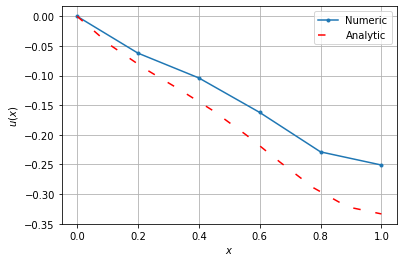

In [71]:
#"Numeric vs Analytic Solution" Figure 1.1a)
#Coarse spacial discretization M=4

#Obtain numerical solution to poisson equation
xaxis, answer = poissonSolve_DN(4,0,0,f_1abc)
xaxis2 = np.linspace(xaxis[0],xaxis[-1], 10)

#Plotting
fig, ax = plt.subplots()
ax.plot(xaxis,answer, label="Numeric", marker = ".") #Plot numerical solution
ax.plot(xaxis2,analytic_1a(xaxis2), linestyle = (0, (5,10)),label="Analytic", color="red") #Plot analytic solution
ax.set_xlabel("$x$")
ax.set_ylabel("$u(x)$")
ax.legend()
ax.grid()
plt.show()

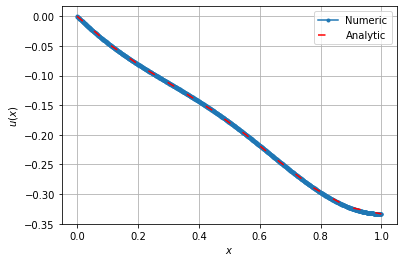

In [72]:
#"Numeric vs Analytic Solution" Figure 1.1b)
#Fine spacial discretization M=1000

#Obtain numerical solution to poisson equation
xaxis, answer = poissonSolve_DN(1000,0,0,f_1abc)
xaxis2 = np.linspace(xaxis[0],xaxis[-1], 10)

#Plotting
fig, ax = plt.subplots()
ax.plot(xaxis,answer, label="Numeric", marker = ".") #Plot numerical solution
ax.plot(xaxis2,analytic_1a(xaxis2), linestyle = (0, (5,10)),label="Analytic", color="red") #Plot analytic solution
ax.set_xlabel("$x$")
ax.set_ylabel("$u(x)$")
ax.legend()
ax.grid()
plt.show()

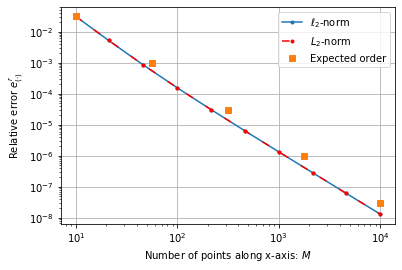

Time:  0.9170665740966797
The absolute value of slope of the error plot is 2.121627010210105


In [73]:
#Convergence plot. Figure 1.2
beep = time.time()
ms, errorsdisc, errorscont = errorPlot(poissonSolve_DN, f_1abc, analytic_1a, 0, 0,startindex=1, endindex=4, returnvalue=True)
print("Time: ", time.time()-beep)
print("The absolute value of slope of the error plot is", estimateOrder(ms,errorsdisc))

## Problem b

In [74]:
#analytic solution for problem 1b
def analytic_1b(x):
    return 1/6*(x**3-x)+1/(4*np.pi**2)*(1-np.cos(2*np.pi*x))+1

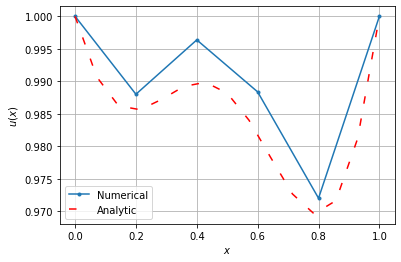

In [75]:
#"Numeric vs Analytic Solution". Figure 1.3a)
#Coarse spacial discretization M=4

#Obtain the numerical solution
axis, sol = poissonSolve_DD(4,1,1,f_1abc)
axis2 = np.linspace(axis[0], axis[-1], 15)

#Plotting
fig, ax = plt.subplots()

ax.plot(axis, sol, label="Numerical", marker = ".") #Plot numerical solution
ax.plot(axis2,analytic_1b(axis2), linestyle = (0, (5,10)),label="Analytic", color="red") #Plot analytic solution
ax.set_xlabel("$x$")
ax.set_ylabel("$u(x)$")
ax.legend()
ax.grid()
plt.show()

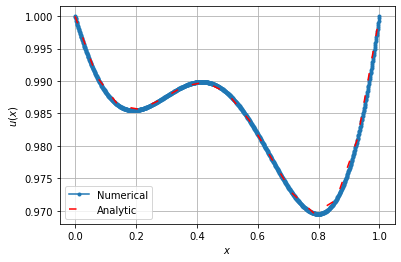

In [76]:
#"Numeric vs Analytic Solution". Figure 1.3b)
#Fine spacial discretization M=1000

#Obtain the numerical solution
axis, sol = poissonSolve_DD(1000,1,1,f_1abc)
axis2 = np.linspace(axis[0], axis[-1], 15)

#Plotting
fig, ax = plt.subplots()

ax.plot(axis, sol, label="Numerical", marker = ".") #Plot numerical solution
ax.plot(axis2,analytic_1b(axis2), linestyle = (0, (5,10)),label="Analytic", color="red") #Plot analytic solution
ax.set_xlabel("$x$")
ax.set_ylabel("$u(x)$")
ax.legend()
ax.grid()
plt.show()

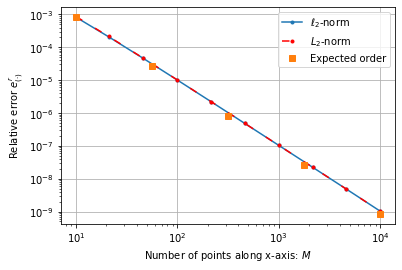

Time:  0.8122110366821289
The absolute value for slope of the error plot is 1.9701015617740398


In [77]:
#Make convergence plot for this task. Figure 1.4
beep = time.time()
ms, errordisc, errorcont = errorPlot(poissonSolve_DD, f_1abc, analytic_1b, analytic_1b(0), analytic_1b(1), startindex=1, endindex=4, returnvalue=True)
print("Time: ", time.time()-beep)
print("The absolute value for slope of the error plot is", estimateOrder(ms, errordisc))



## Problem c

In [55]:
axis,sol = poissonSolve_NN(1000,0,1/2,f_1abc,1) #Fails since A is singular. A is singular because there is no unique solution. Sol: exchange one neumann with a dirichlet.

LinAlgError: Singular matrix

## Problem d

First we attempt to solve the equation using a second order method. We use $\varepsilon =1$.

In [78]:
#The second derivative of fsol
def fxx(x,eps = 1):
    return (-(2*eps - 4*x**2 + 4*x - 1)) / (eps**2) *np.exp((-(4*x**2 - 4*x + 1)) / (4*eps))

#The analytical solution of this problem
def fsol(x,eps=1):
    return np.exp((-1/eps)*(x-1/2)**2)


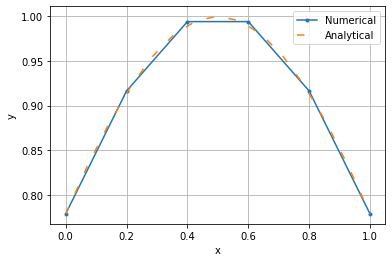

In [79]:
#Obtain coarse solution
axis, sol = poissonSolve_DD(4,fsol(0),fsol(1),fxx)
axis2 = np.linspace(axis[0], axis[-1], 15)

#Plotting the solution. Figure 1.6a)
plt.plot(axis,sol,label="Numerical", marker = ".")
plt.plot(axis2,fsol(axis2),linestyle = (0, (5,10)),label="Analytical")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

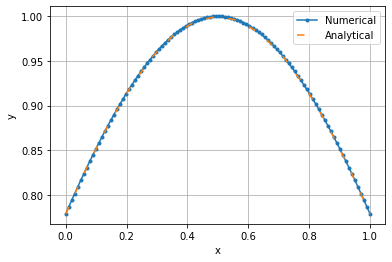

In [81]:
#Obtain fine solution
axis, sol = poissonSolve_DD(100,fsol(0),fsol(1),fxx)
axis2 = np.linspace(axis[0], axis[-1], 15)

#Plotting the solution. Figure 1.6b)
plt.plot(axis,sol,label="Numerical", marker = ".")
plt.plot(axis2,fsol(axis2),linestyle = (0, (5,10)),label="Analytical")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

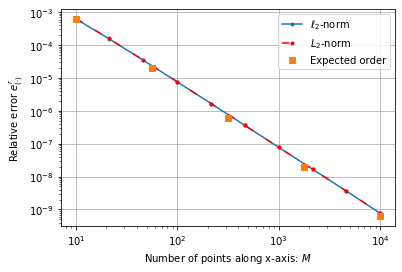

Time:  0.9540698528289795
The absolute value of slope of the error plot is 1.9711612246803485


In [82]:
#Plotting the error of the second order method. Figure 1.7b)
beep = time.time()
ms, errorsdisc, errorscont = errorPlot(poissonSolve_DD, fxx, fsol, fsol(0), fsol(1), startindex=1, endindex=4, returnvalue=True)
print("Time: ", time.time()-beep)
print("The absolute value of slope of the error plot is", estimateOrder(ms,errorsdisc))

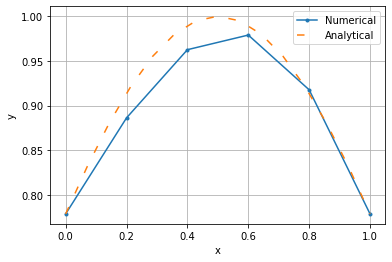

In [83]:
#Solving the equation coarsly with a first order method
axis, sol = poissonSolve_DD1(4,fsol(0),fsol(1),fxx)
axis2 = np.linspace(axis[0], axis[-1], 15)

#Plotting. Figure 1.5a)
plt.plot(axis,sol,label="Numerical", marker = ".")
plt.plot(axis2, fsol(axis2),linestyle = (0, (5,10)), label="Analytical")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

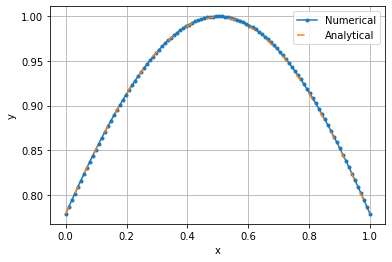

In [84]:
#Solving the equation nicely with a first order method
axis, sol = poissonSolve_DD1(100,fsol(0),fsol(1),fxx)
axis2 = np.linspace(axis[0], axis[-1], 15)

#Plotting. Figure 1.5b)
plt.plot(axis,sol,label="Numerical", marker = ".")
plt.plot(axis2, fsol(axis2),linestyle = (0, (5,10)), label="Analytical")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

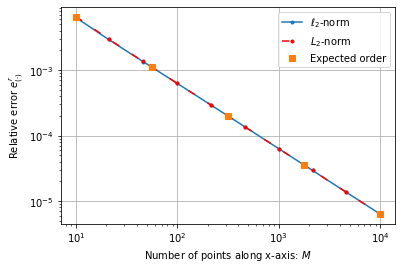

Time:  0.6250460147857666
The absolute value of slope of the error plot is 1.000753071738246


In [85]:
#Plotting the error of the first order method. Figure 1.7a)
beep = time.time()
ms, errorsdisc, errorscont = errorPlot(poissonSolve_DD1, fxx, fsol, fsol(0), fsol(1), startindex=1, endindex=4, returnvalue=True, expected_order=1)
print("Time: ", time.time()-beep)
print("The absolute value of slope of the error plot is", estimateOrder(ms,errorsdisc))

## AMR

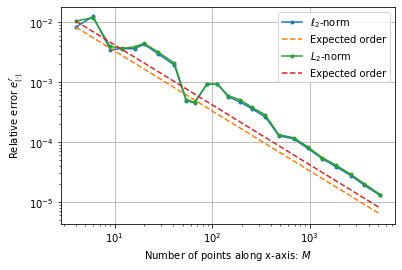

time:  6.083929538726807
The slope coefficient is: 0.9000778028833802


In [62]:
#Convergence plot 1st order FDM, AMR, Average splitting criterion. Figure 1.8a)
beep = time.time()
x_axis,y,statistics = AMR_DD(make_abc_1st_order,4,3.3*10**-10,fsol(0),fsol(1),fsol,"avg")

errorPlot_AMR(statistics,1)
print("time: ", time.time()-beep)
print("The slope coefficient is:",estimateOrder(statistics[:,0],statistics[:,1]))

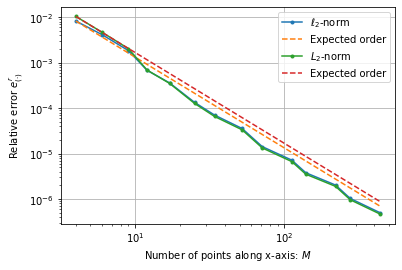

time:  1.5250146389007568
The slope coefficient is: 2.0708456306324403


In [63]:
#Convergence plot 2nd order FDM, AMR, Average splitting criterion. Figure 1.8b)
beep = time.time()
x_axis,y,statistics = AMR_DD(make_abc_2nd_order,4,3.3*10**-13,fsol(0),fsol(1),fsol,"avg")

errorPlot_AMR(statistics,2)
print("time: ", time.time()-beep)
print("The slope coefficient is:",estimateOrder(statistics[:,0],statistics[:,1]))

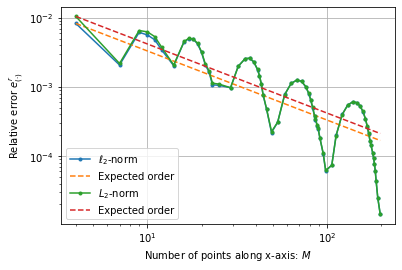

time:  2.2389156818389893
The slope coefficient is: 1.6288472091101918


In [64]:
#Convergence plot 1st order FDM, AMR, Maximum splitting criterion. Figure 1.8c)
beep = time.time()
x_axis,y,statistics = AMR_DD(make_abc_1st_order,4,3.3*10**-10,fsol(0),fsol(1),fsol,"max")


errorPlot_AMR(statistics,1)
print("time: ", time.time()-beep)
print("The slope coefficient is:",estimateOrder(statistics[:,0],statistics[:,1]))

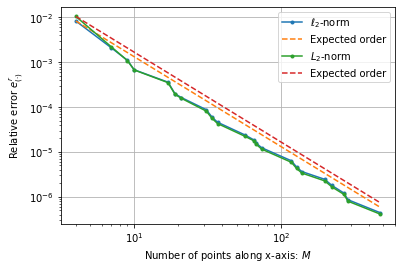

time:  1.583345890045166
The slope coefficient is: 2.0584119230831375


In [65]:
#Convergence plot 2nd order FDM, AMR, Maximum splitting criterion. Figure 1.8d)
beep = time.time()
x_axis,y,statistics = AMR_DD(make_abc_2nd_order,4,3.3*10**-13,fsol(0),fsol(1),fsol,"max")

errorPlot_AMR(statistics,2)
print("time: ", time.time()-beep)
print("The slope coefficient is:",estimateOrder(statistics[:,0],statistics[:,1]))